<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/GO_referral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-18-4180da783c12>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['紹介元'] = pd.Categorical(df['紹介元'], categories=categories)
<ipython-input-18-4180da783c12>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


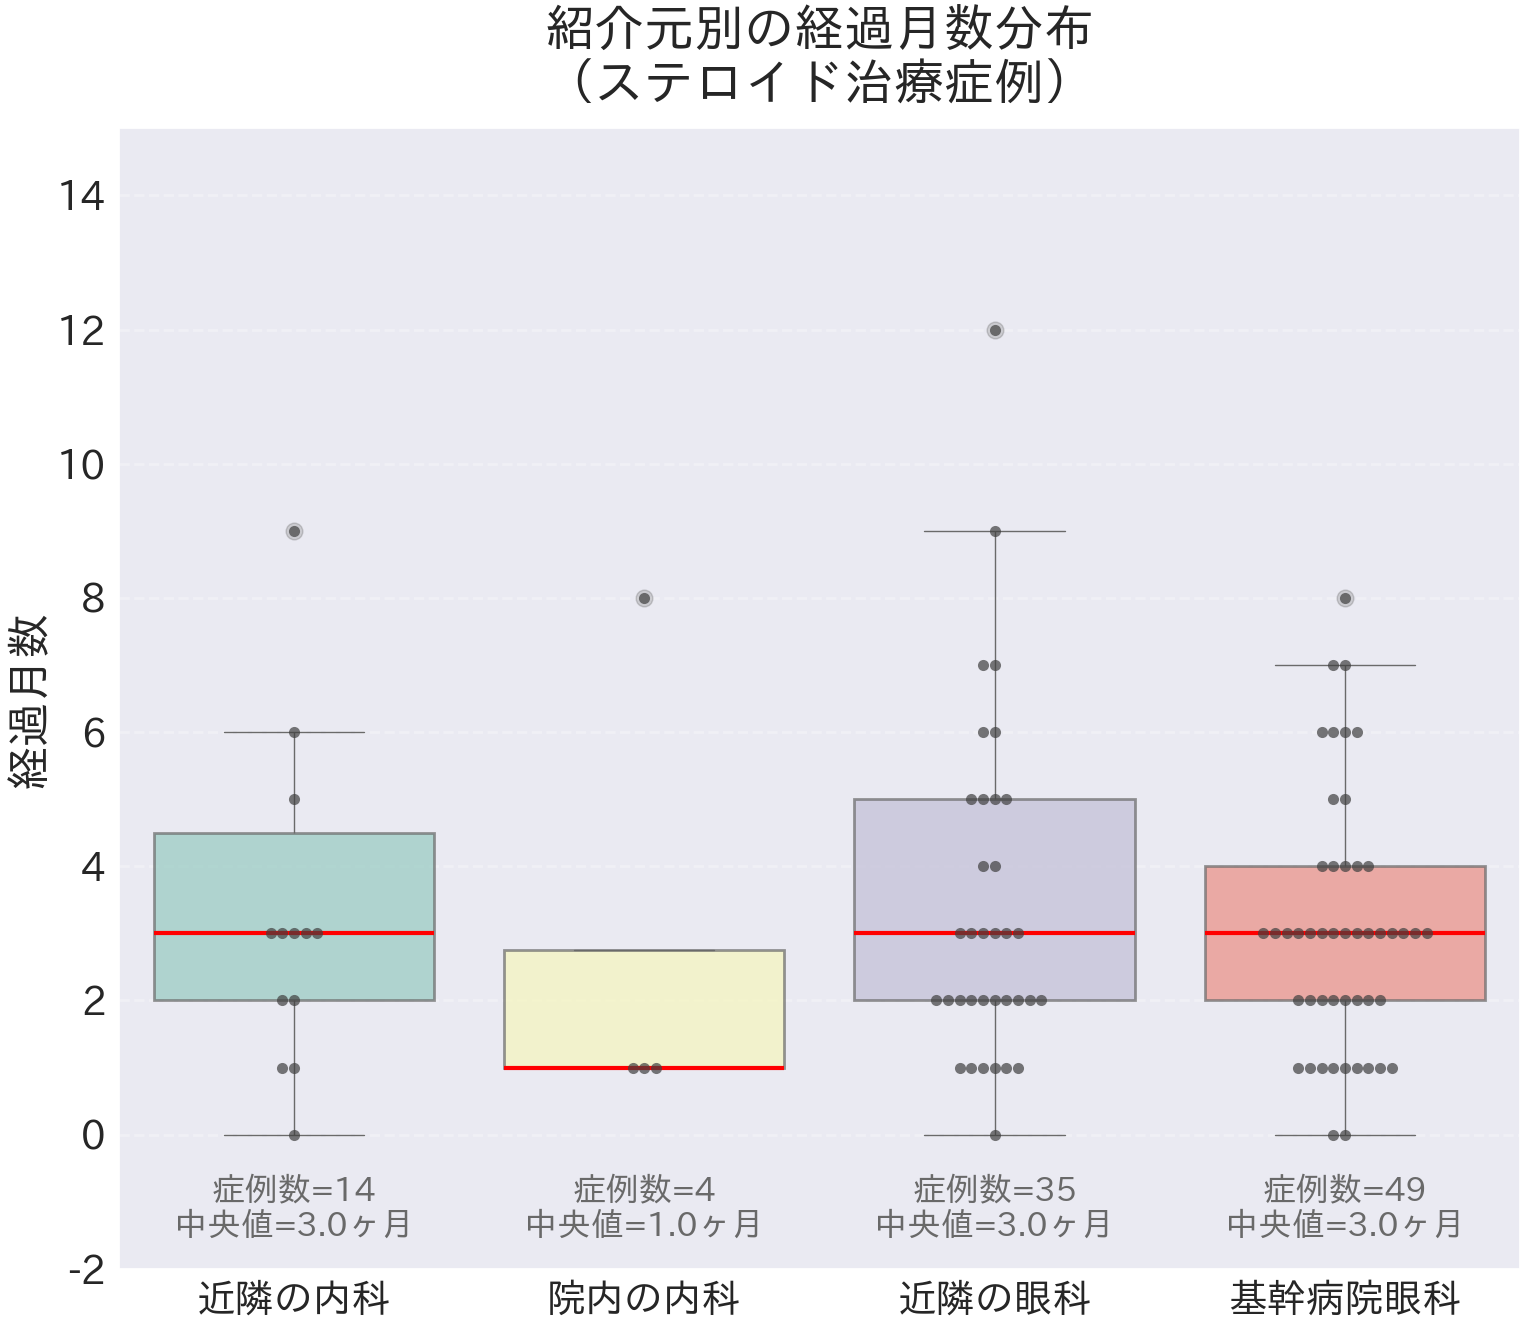

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# フォント設定を最初に行う
plt.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic', font_scale=2.5)  # font_scale を2.5に増加
plt.rcParams['axes.unicode_minus'] = False

def load_and_prepare_data(file_path):
    """データの読み込みと前処理を行う関数"""
    df = pd.read_excel(file_path, sheet_name='A0403_検査結果')

    referral_code_map = {
        "0": "近隣の内科",
        "1": "院内の内科",
        "2": "近隣の眼科",
        "3": "基幹病院眼科",
    }

    df['紹介元'] = df[
        "0近隣内科、1院内内科、2近隣眼科、3基幹病院眼科、4当院眼科、5.その他"
    ].astype(str).map(referral_code_map)

    df['いつから（M）'] = pd.to_numeric(df['いつから（M）'], errors='coerce')

    return df

def filter_steroid_cases(df):
    """ステロイド治療症例のフィルタリング"""
    steroid_columns = [col for col in df.columns if "ステロイド" in col]
    if not steroid_columns:
        print("警告: ステロイド治療の列が見つかりませんでした。全データを使用します。")
        return df

    return df[df[steroid_columns[0]] != 0]

def create_modern_boxplot(df, categories):
    """モダンな箱ひげ図の作成（seabornを使用）"""
    # プロット設定
    plt.figure(figsize=(16, 14))

    df['紹介元'] = pd.Categorical(df['紹介元'], categories=categories)

    # 箱ひげ図
    ax = sns.boxplot(
        data=df,
        x='紹介元',
        y='いつから（M）',
        order=categories,
        palette='Set3',
        showfliers=True,
        medianprops={"color": "red", "linewidth": 3},
        boxprops={"alpha": 0.7, "linewidth": 2},
        flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'alpha': 0.3, 'markersize': 12}
    )

    # スウォームプロット
    sns.swarmplot(
        data=df,
        x='紹介元',
        y='いつから（M）',
        order=categories,
        color='0.25',
        size=8,
        alpha=0.7,
        dodge=True
    )

    # グラフの設定
    plt.xlabel('')
    plt.ylabel('経過月数', fontsize=32, fontweight='bold')  # さらに大きく
    plt.title('紹介元別の経過月数分布\n（ステロイド治療症例）',
              fontsize=36, pad=20, fontweight='bold')  # さらに大きく

    plt.ylim(-2, 15)

    # グリッド線
    plt.grid(axis='y', linestyle='--', alpha=0.3, linewidth=2)

    # 軸の設定
    plt.xticks(rotation=0, fontsize=28)  # さらに大きく
    plt.yticks(fontsize=28)  # さらに大きく

    # 余白の調整
    plt.subplots_adjust(bottom=0.2, left=0.15)  # 左余白を増やして軸ラベルが切れないように

    # 統計情報
    for i, category in enumerate(categories):
        data = df[df['紹介元'] == category]['いつから（M）'].dropna()
        if len(data) > 0:
            median = data.median()
            count = len(data)
            plt.text(i, -1.5, f'症例数={count}\n中央値={median:.1f}ヶ月',
                    horizontalalignment='center',
                    size=24,  # さらに大きく
                    color='dimgray',
                    fontweight='bold')

    # タイトルと軸ラベルが切れないように調整
    plt.tight_layout()
    return plt.gcf()

def main():
    file_path = "/content/drive/MyDrive/発表/アムジェン社内講演20250214/甲状腺眼症ステロイド紹介元.xlsx"

    display_order = [
        "近隣の内科",
        "院内の内科",
        "近隣の眼科",
        "基幹病院眼科",
    ]

    df = load_and_prepare_data(file_path)
    df_filtered = filter_steroid_cases(df)
    fig = create_modern_boxplot(df_filtered, display_order)
    plt.show()

if __name__ == "__main__":
    main()

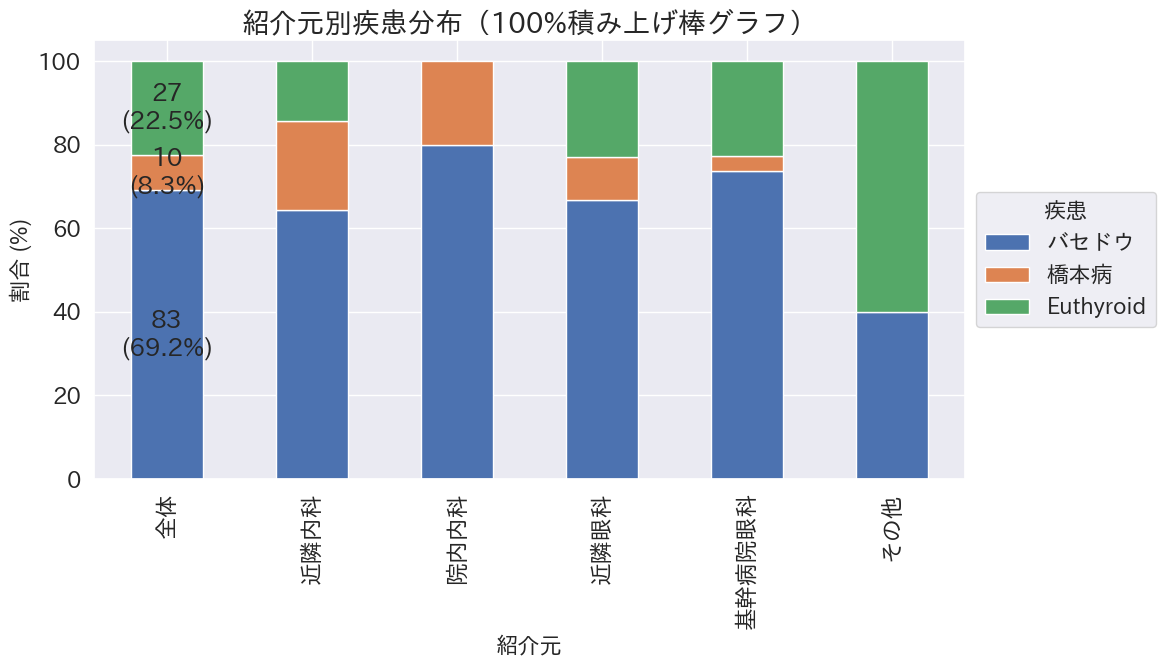

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# フォント設定
plt.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic', font_scale=1.5)
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
df = pd.read_excel(file_path, sheet_name='A0403_検査結果')

# クロス集計の作成
cross_tab = pd.crosstab(
    df['0近隣内科、1院内内科、2近隣眼科、3基幹病院眼科、4当院眼科、5.その他'],
    df['0バセドウ、1橋本病、2Euthyroid']
)

# インデックス（紹介元）の日本語化
cross_tab.index = cross_tab.index.map({
    0: '近隣内科',
    1: '院内内科',
    2: '近隣眼科',
    3: '基幹病院眼科',
    4: '当院眼科',
    5: 'その他'
})

# 列（疾患）の日本語化
cross_tab.columns = ['バセドウ', '橋本病', 'Euthyroid']

# 全体の集計を追加
total_row = pd.DataFrame(cross_tab.sum()).T
total_row.index = ['全体']

# 全体を一番上に追加
cross_tab_with_total = pd.concat([total_row, cross_tab])

# 100%積み上げ棒グラフ用データの作成（割合に変換）
percentage_df = cross_tab_with_total.div(cross_tab_with_total.sum(axis=1), axis=0) * 100

# グラフ作成
fig, ax = plt.subplots(figsize=(12, 7))
percentage_df.plot(kind='bar', stacked=True, ax=ax)

# タイトルとラベルの設定
ax.set_title("紹介元別疾患分布（100%積み上げ棒グラフ）", fontsize=20)
ax.set_xlabel("紹介元", fontsize=16)
ax.set_ylabel("割合 (%)", fontsize=16)

# 凡例の設定
ax.legend(title="疾患", fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1.0, 0.5))

# 全体（一番左の棒）にのみ実数を表示
y_offset = 0
for j in range(len(cross_tab_with_total.columns)):
    value = cross_tab_with_total.iloc[0, j]  # 最初の行（全体）のみ
    percentage = percentage_df.iloc[0, j]
    if percentage > 0:  # 0%より大きい場合のみ表示
        ax.text(0, y_offset + percentage/2,
               f'{value:,.0f}\n({percentage:.1f}%)',
               ha='center', va='center')
    y_offset += percentage

# レイアウトの調整
plt.tight_layout()
plt.show()

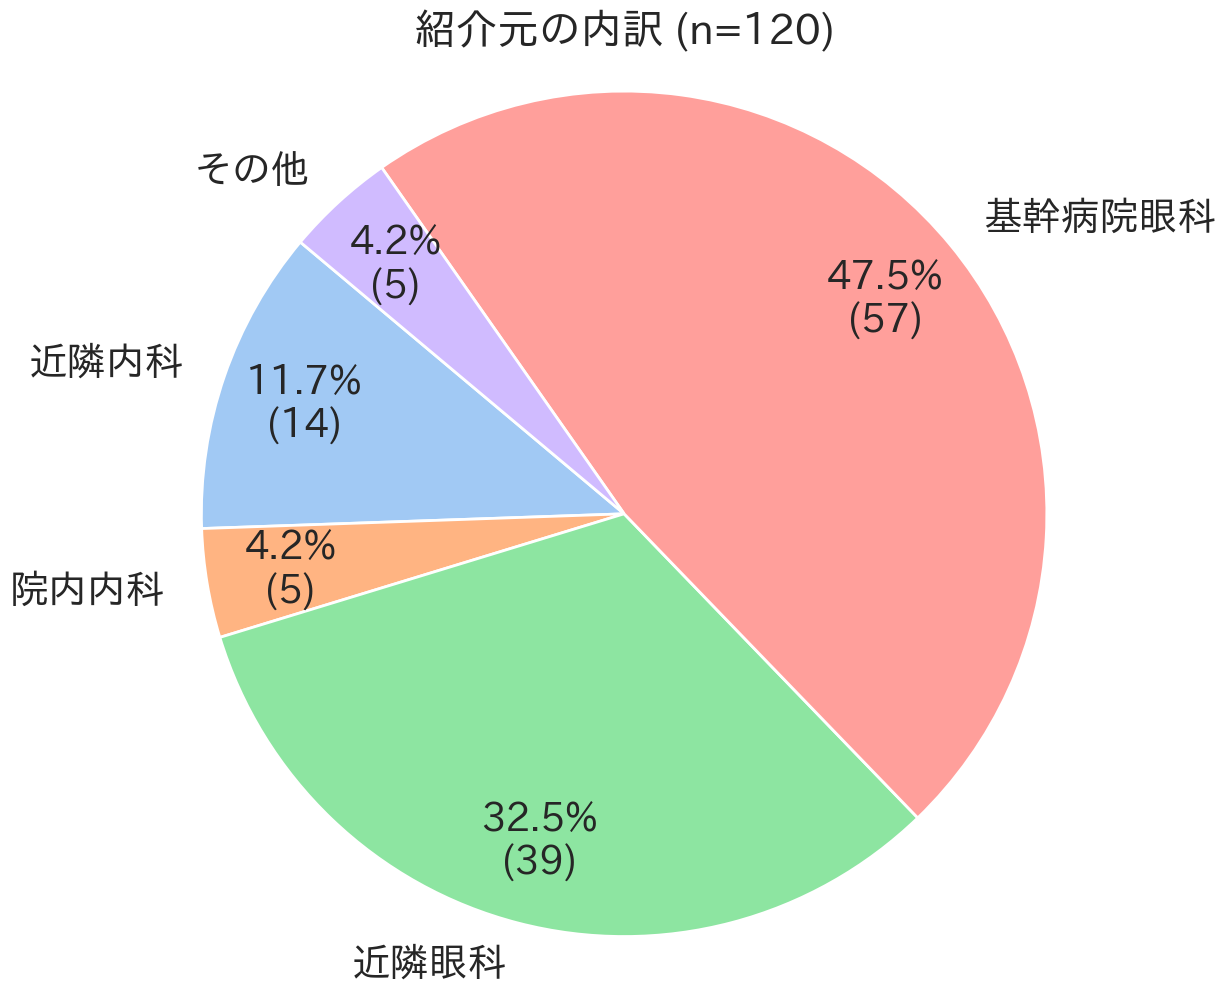

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 紹介元の内訳データを集計
referral_distribution = df['0近隣内科、1院内内科、2近隣眼科、3基幹病院眼科、4当院眼科、5.その他'].value_counts().sort_index()

# 紹介元名を日本語にマッピング
referral_distribution.index = referral_distribution.index.map({
    0: '近隣内科',
    1: '院内内科',
    2: '近隣眼科',
    3: '基幹病院眼科',
    4: '当院眼科',
    5: 'その他'
})

# パーセンテージと絶対数を表示する関数
def autopct_format(pct, all_values):
    absolute = int(round(pct/100 * sum(all_values)))
    return f'{pct:.1f}%\n({absolute})'  # 改行でパーセンテージと絶対数を分けて表示

# 円グラフの作成
plt.figure(figsize=(12, 12))
colors = sns.color_palette("pastel", len(referral_distribution))
wedges, texts, autotexts = plt.pie(
    referral_distribution,
    labels=referral_distribution.index,
    autopct=lambda pct: autopct_format(pct, referral_distribution),
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 28},  # ラベル文字サイズ
    pctdistance=0.8  # パーセンテージ位置を調整
)

# 自動テキスト（パーセンテージ・絶対数）のフォントサイズ調整
for autotext in autotexts:
    autotext.set_fontsize(28)
    autotext.set_weight('bold')  # 太字で見やすく

# タイトルの設定
plt.title("紹介元の内訳 (n=120)", fontsize=30, weight='bold')
plt.axis('equal')  # 円を正円に保つ
plt.show()


In [39]:
# "主訴"列の値を"、"で分割し、個別の症状としてカウントする
chief_complaints_expanded = df['主訴'].dropna().str.split('、').explode()

# 症状ごとの出現頻度をカウント
chief_complaints_split_stats = chief_complaints_expanded.value_counts().reset_index()
chief_complaints_split_stats.columns = ['症状', '件数']

# 症状の統合ルールを辞書で定義
symptom_mapping = {
    '眼瞼後退': '眼瞼後退',
    '上眼瞼後退': '眼瞼後退',
    '眼球運動制限': '眼瞼後退',
    '眼痛': '眼痛',
    '球後痛': '眼痛',
    '眼球運動痛': '眼痛',
    '痛み': '眼痛',
    '球後の違和感': '眼痛',
    '視神経症': '視神経症',
    '視力低下': '視神経症',
    '斜視': '複視'
}

# 症状列をマッピングして統合
chief_complaints_split_stats['統合症状'] = chief_complaints_split_stats['症状'].map(symptom_mapping).fillna(chief_complaints_split_stats['症状'])

# 統合後の症状ごとの件数を集計
consolidated_symptoms_stats = chief_complaints_split_stats.groupby('統合症状')['件数'].sum().reset_index().sort_values(by='件数', ascending=False)

# 結果を表示
consolidated_symptoms_stats


,統合症状,件数
8,複視,70
2,眼球突出,36
6,眼瞼腫脹,34
9,視神経症,12
3,眼痛,10
5,眼瞼後退,6
4,眼瞼下垂,3
1,充血,2
0,,1
7,睫毛内反症,1
